참고 사이트

https://github.com/DonghyunAnn/Gbig-Hackathon/blob/master/notebook/안동현/MCLP_Roaddata.ipynb

https://wkddmswh99.tistory.com/16

# 1. Package Import

In [318]:
# pip install yellowbrick

In [107]:
import matplotlib
matplotlib.matplotlib_fname()

'/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

## Data Import

In [41]:
df_cost = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/구별 의료 및 인구 데이터.csv')
df_station = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울교통공사_역주소 및 전화번호_20230331.csv', encoding='cp949')
df_shop = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 관광 쇼핑.csv', encoding='cp949')
df_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 병의원 위치 정보.csv', encoding='cp949')
df_el_me = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인의료복지시설) 목록.csv', encoding='cp949')
df_el_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인주거복지시설) 목록.csv', encoding='cp949')
df_dis_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인의료재활시설) 목록.csv', encoding='cp949')
df_dis_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인거주시설) 목록.csv', encoding='cp949')
df_med = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 약국 운영시간 정보.csv', encoding='cp949')
df_subway_people = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 지하철호선별 역별 승하차 인원 정보(2022).csv')
df_dis_number = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 장애인 현황 (장애유형별:동별) 통계 2022.csv')
df_el_number = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 고령자현황 (구별) 통계.csv')


# 2. preprocessing

In [42]:
# 구별 지하철 역 개수 count

df_station['지하철 구'] = df_station['도로명주소'].str.split().str[1]
df_station_count = df_station.groupby(by='지하철 구').count().iloc[:,1].to_frame()
df_station_count = df_station_count.reset_index()
df_station_count.columns = ['시군구', '지하철역 개수']
df_station_count.head()
#df_station.head()

,시군구,지하철역 개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,고양시,1


In [43]:
# 구별 쇼핑 구역 개수 count

df_shop_juso = df_shop[df_shop['언어'] == 'ko'][['상호명', '신주소']]
df_shop_juso['신주소'] = df_shop_juso['신주소'].str.replace('\d+', '', regex=True)
df_shop_juso['구'] = df_shop_juso['신주소'].str.split().str[1]
df_shop_count = df_shop_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_shop_count = df_shop_count.reset_index()
df_shop_count.columns = ['시군구', '쇼핑 구역 개수']
df_shop_count.head()

,시군구,쇼핑 구역 개수
0,강남구,28
1,광진구,3
2,금천구,2
3,도봉구,2
4,동대문구,4


In [44]:
# 구별 병의원 개수

df_hospital_juso = df_hospital[['기관ID', '주소']]
df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()
df_hospital_juso_count = df_hospital_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_hospital_juso_count = df_hospital_juso_count.reset_index()
df_hospital_juso_count.columns = ['시군구', '병의원 개수']
df_hospital_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_5023/1115379810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()


,시군구,병의원 개수
0,강남구,3069
1,강동구,912
2,강북구,488
3,강서구,966
4,관악구,744


In [45]:
# 구별 노인의료복지시설 개수 count
df_el_me_juso = df_el_me[['시설명', '시군구명']]
df_el_me_juso_count = df_el_me_juso.groupby(by='시군구명').count().reset_index()
df_el_me_juso_count.columns = ['시군구', '노인의료복지시설 개수']
df_el_me_juso_count.head()

,시군구,노인의료복지시설 개수
0,강남구,10
1,강동구,24
2,강북구,32
3,강서구,39
4,관악구,36


In [46]:
# 구별 노인주거복지시설 개수 count

df_el_house_juso = df_el_house[['시설명', '시군구명']]
df_el_house_juso_count = df_el_house_juso.groupby(by='시군구명').count().reset_index()
df_el_house_juso_count.columns = ['시군구', '노인주거복지시설 개수']
df_el_house_juso_count.head()

,시군구,노인주거복지시설 개수
0,강남구,2
1,강동구,1
2,강서구,3
3,광진구,2
4,금천구,2


In [47]:
# 구별 장애인의료재활시설

df_dis_hospital_juso = df_dis_hospital[['시설명', '시군구명']]
df_dis_hospital_juso_count = df_dis_hospital_juso.groupby(by='시군구명').count().reset_index()
df_dis_hospital_juso_count.columns = ['시군구', '장애인의료재활시설 개수']
df_dis_hospital_juso_count.head()

,시군구,장애인의료재활시설 개수
0,강동구,1
1,관악구,2
2,마포구,1
3,성동구,1
4,은평구,1


In [48]:
# 구별 장애인거주시설

df_dis_house_juso = df_dis_house[['시설명', '시군구명']]
df_dis_house_juso_count = df_dis_house_juso.groupby(by='시군구명').count().reset_index()
df_dis_house_juso_count.columns = ['시군구', '장애인거주시설 개수']
df_dis_house_juso_count.head()

,시군구,장애인거주시설 개수
0,강남구,24
1,강동구,20
2,강북구,18
3,강서구,29
4,관악구,8


In [49]:
# 구별 약국 개수

df_med_juso = df_med[['약국ID', '주소']]
df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()
df_med_juso_count = df_med_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_med_juso_count = df_med_juso_count.reset_index()
df_med_juso_count.columns = ['시군구', '약국 개수']
df_med_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_5023/4276189698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()


,시군구,약국 개수
0,강남구,525
1,강동구,260
2,강북구,176
3,강서구,289
4,관악구,234


In [50]:
# 2022년 역별 승하차 인원 정보

df_station_juso = df_station[['역명', '지하철 구']]

df_subway_people.head(10)
df_subway_people['역 이용 총 승객 수'] = df_subway_people['승차총승객수'] + df_subway_people['하차총승객수']
df_subway_people = df_subway_people[['역명', '역 이용 총 승객 수']]

merged_subway_df = pd.merge(df_station_juso, df_subway_people, on='역명')

merged_subway_df_count = merged_subway_df.groupby(by='지하철 구')['역 이용 총 승객 수'].sum().reset_index()
merged_subway_df_count.columns = ['시군구', '구별 지하철 총 승객 수']
merged_subway_df_count.head()

,시군구,구별 지하철 총 승객 수
0,강남구,350427151
1,강동구,123564526
2,강북구,32071161
3,강서구,96283191
4,고양시,3319770


In [51]:
df_cost.columns = ['시군구', '총 의료비용', '총 거주인구']
df_cost = df_cost[['시군구', '총 의료비용']]
df_cost.head()

,시군구,총 의료비용
0,강남구,1600231796936
1,강동구,304912421021
2,강북구,134752996931
3,강서구,367726959119
4,관악구,192331403810


In [52]:
df_dis_number = df_dis_number.iloc[3:].reset_index(drop=True)
df_dis_number = df_dis_number.iloc[:,1:]
df_dis_number.columns = ['시군구', '장애 인구']
df_dis_number.head()

,시군구,장애 인구
0,종로구,5834
1,중구,5552
2,용산구,7621
3,성동구,11092
4,광진구,12183


In [53]:
df_el_number = df_el_number.iloc[:,1:]
df_el_number.columns = ['시군구', '전체인구', '65세 이상 인구']
df_el_number = df_el_number.iloc[2:].reset_index(drop = 'TRUE')
df_el_number.tail()

,시군구,전체인구,65세 이상 인구
20,관악구,501226,82447
21,서초구,408451,62347
22,강남구,534103,81715
23,송파구,664514,103573
24,강동구,464037,78340


In [54]:
# 모든 데이터 프레임 결합

merged_df = pd.merge(df_station_count, df_shop_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_me_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_med_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, merged_subway_df_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_cost, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_number, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_number, on='시군구', how='left')

merged_df = merged_df[~merged_df['시군구'].str.endswith('시')].reset_index(drop=True)

merged_df.head()

,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,장애 인구,전체인구,65세 이상 인구
0,강남구,21,28.0,3069.0,10.0,2.0,NaN,24.0,525.0,350427151,1.600232e+12,15158,534103,81715
1,강동구,14,NaN,912.0,24.0,1.0,1.0,20.0,260.0,123564526,3.049124e+11,18785,464037,78340
2,강북구,3,NaN,488.0,32.0,NaN,NaN,18.0,176.0,32071161,1.347530e+11,17186,297702,66307
3,강서구,9,NaN,966.0,39.0,3.0,NaN,29.0,289.0,96283191,3.677270e+11,28508,574638,97128
4,관악구,4,NaN,744.0,36.0,NaN,2.0,8.0,234.0,103761344,1.923314e+11,20228,501226,82447


In [55]:
final_df = merged_df.fillna(0)
final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)
final_df.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_5023/411244477.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_5023/411244477.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)


,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,장애 인구,전체인구,65세 이상 인구
0,강남구,21,28,3069,10,2,0,24,525,350427151,1600231796936,15158,534103,81715
1,강동구,14,0,912,24,1,1,20,260,123564526,304912421021,18785,464037,78340
2,강북구,3,0,488,32,0,0,18,176,32071161,134752996931,17186,297702,66307
3,강서구,9,0,966,39,3,0,29,289,96283191,367726959119,28508,574638,97128
4,관악구,4,0,744,36,0,2,8,234,103761344,192331403810,20228,501226,82447


In [60]:
final_df.columns

Index(['시군구', '지하철역 개수', '쇼핑 구역 개수', '병의원 개수', '노인의료복지시설 개수', '노인주거복지시설 개수',
       '장애인의료재활시설 개수', '장애인거주시설 개수', '약국 개수', '구별 지하철 총 승객 수', '총 의료비용',
       '장애 인구', '전체인구', '65세 이상 인구'],
      dtype='object')

In [63]:
final_df.shape

(25, 14)

In [74]:
final_df['병원, 약국 개수'] = final_df['병의원 개수'] + final_df['약국 개수']
final_df['노인 시설 개수'] = final_df['노인의료복지시설 개수'] + final_df['노인주거복지시설 개수']
final_df['장애인 시설 개수'] = final_df['장애인의료재활시설 개수'] + final_df['장애인거주시설 개수']

final_df = final_df[['시군구', '지하철역 개수', '쇼핑 구역 개수',
       '구별 지하철 총 승객 수', '총 의료비용',
       '장애 인구', '전체인구', '65세 이상 인구', '병원, 약국 개수', '장애인 시설 개수', '노인 시설 개수']]
final_df.head()

,시군구,지하철역 개수,쇼핑 구역 개수,구별 지하철 총 승객 수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수
0,강남구,21,28,350427151,1600231796936,15158,534103,81715,3594,24,12
1,강동구,14,0,123564526,304912421021,18785,464037,78340,1172,21,25
2,강북구,3,0,32071161,134752996931,17186,297702,66307,664,18,32
3,강서구,9,0,96283191,367726959119,28508,574638,97128,1255,29,42
4,관악구,4,0,103761344,192331403810,20228,501226,82447,978,10,36


In [75]:
final_df

,시군구,지하철역 개수,쇼핑 구역 개수,구별 지하철 총 승객 수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수
0,강남구,21,28,350427151,1600231796936,15158,534103,81715,3594,24,12
1,강동구,14,0,123564526,304912421021,18785,464037,78340,1172,21,25
2,강북구,3,0,32071161,134752996931,17186,297702,66307,664,18,32
3,강서구,9,0,96283191,367726959119,28508,574638,97128,1255,29,42
4,관악구,4,0,103761344,192331403810,20228,501226,82447,978,10,36
5,광진구,11,3,179447316,245522858974,12183,351252,54071,772,1,22
6,구로구,7,0,121861394,235566747285,18520,418418,75890,795,9,17
7,금천구,1,2,37408464,263003873689,11615,242818,42928,518,8,27
8,노원구,13,0,156627591,282478291357,26696,508014,92040,1029,21,32
9,도봉구,3,2,46897099,108481699876,15345,313989,66998,516,12,56


# 2. PCA

## (1) Scaling

In [76]:
# '시군구' 열을 제외한 수치형 데이터 선택
numeric_cols = final_df.iloc[:,1:]

# 데이터 표준화
scaler = StandardScaler()
scaler.fit(numeric_cols)
df_scaled = scaler.transform(numeric_cols)
df_scaled

array([[ 1.5860039 ,  2.63986579,  2.20310808,  4.35062715, -0.0923162 ,
         1.19923713,  0.76205618,  4.2038289 ,  1.75381015, -0.79083732],
       [ 0.4846123 , -0.68969467, -0.21200594, -0.06917854,  0.5561284 ,
         0.62917002,  0.59080544,  0.26385769,  1.36233467,  0.19016317],
       [-1.24614592, -0.68969467, -1.18601789, -0.64978562,  0.27025498,
        -0.7241556 , -0.01976056, -0.56252768,  0.97085919,  0.71839421],
       [-0.30209598, -0.68969467, -0.50243515,  0.14515319,  2.29443193,
         1.52903576,  1.54412663,  0.39887735,  2.40626928,  1.47300997],
       [-1.08880427, -0.68969467, -0.4228249 , -0.45332027,  0.81411174,
         0.93174511,  0.79919857, -0.05173042, -0.07307542,  1.02024051],
       [ 0.01258733, -0.33295605,  0.38290611, -0.2718238 , -0.62419453,
        -0.28846506, -0.64062697, -0.38683945, -1.24750186, -0.03622156],
       [-0.6167793 , -0.68969467, -0.23013699, -0.30579541,  0.50875101,
         0.25800724,  0.46649008, -0.34942437

In [77]:
# '시군구' 열을 추출
sigungu_col = merged_df['시군구']

# 표준화된 데이터를 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=numeric_cols.columns)

# '시군구' 열과 표준화된 데이터프레임을 병합
merged_df_scaled = pd.concat([sigungu_col, df_scaled], axis=1)

In [78]:
merged_df_scaled.head()

,시군구,지하철역 개수,쇼핑 구역 개수,구별 지하철 총 승객 수,총 의료비용,장애 인구,전체인구,65세 이상 인구,"병원, 약국 개수",장애인 시설 개수,노인 시설 개수
0,강남구,1.586004,2.639866,2.203108,4.350627,-0.092316,1.199237,0.762056,4.203829,1.753810,-0.790837
1,강동구,0.484612,-0.689695,-0.212006,-0.069179,0.556128,0.629170,0.590805,0.263858,1.362335,0.190163
2,강북구,-1.246146,-0.689695,-1.186018,-0.649786,0.270255,-0.724156,-0.019761,-0.562528,0.970859,0.718394
3,강서구,-0.302096,-0.689695,-0.502435,0.145153,2.294432,1.529036,1.544127,0.398877,2.406269,1.473010
4,관악구,-1.088804,-0.689695,-0.422825,-0.453320,0.814112,0.931745,0.799199,-0.051730,-0.073075,1.020241


## (2) PCA

In [85]:
train_features = merged_df_scaled.iloc[:,1:]

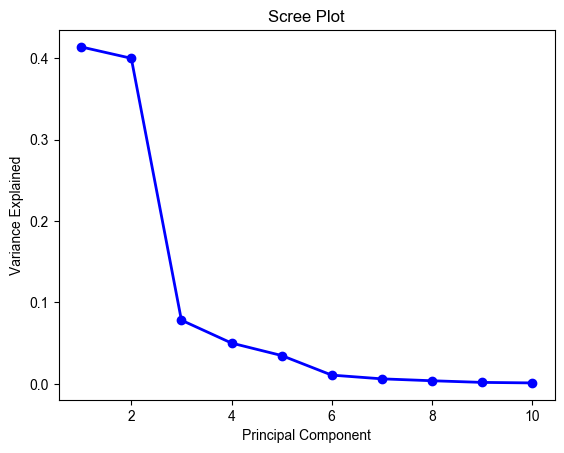

In [86]:
#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(train_features)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [87]:
print(pca.explained_variance_ratio_)

[0.41368342 0.39971607 0.07818403 0.05007462 0.03478032 0.01072096
 0.00613838 0.00380295 0.00177584 0.00112343]


In [89]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(merged_df_scaled.iloc[:,1:])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

print('누적 설명 분산량: ', sum(pca.explained_variance_ratio_).round(4))

누적 설명 분산량:  0.8134


In [90]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, train_features):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = train_features.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, train_features)

# Show first few rows
display(importance_df)

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are')
display(pc2_top_10_features )

# ## PC3 top 10 important features
# pc3_top_10_features = importance_df['PC3'].sort_values(ascending = False)[:10]
# print(), print(f'PC3 top 10 feautres are')
# display(pc3_top_10_features )

# ## PC4 top 10 important features
# pc4_top_10_features = importance_df['PC4'].sort_values(ascending = False)[:10]
# print(), print(f'PC4 top 10 feautres are')
# display(pc4_top_10_features )

,PC1,PC2
지하철역 개수,0.065353,0.417371
쇼핑 구역 개수,0.296430,0.349113
구별 지하철 총 승객 수,0.119573,0.443499
총 의료비용,0.062712,0.424675
장애 인구,0.469163,0.040423
전체인구,0.435071,0.168162
65세 이상 인구,0.472857,0.079010
"병원, 약국 개수",0.151793,0.440137
장애인 시설 개수,0.362423,0.204178
노인 시설 개수,0.319753,0.235195



PC1 top 10 feautres are


65세 이상 인구        0.472857
장애 인구            0.469163
전체인구             0.435071
장애인 시설 개수        0.362423
노인 시설 개수         0.319753
쇼핑 구역 개수         0.296430
병원, 약국 개수        0.151793
구별 지하철 총 승객 수    0.119573
지하철역 개수          0.065353
총 의료비용           0.062712
Name: PC1, dtype: float64


PC2 top 10 feautres are


구별 지하철 총 승객 수    0.443499
병원, 약국 개수        0.440137
총 의료비용           0.424675
지하철역 개수          0.417371
쇼핑 구역 개수         0.349113
노인 시설 개수         0.235195
장애인 시설 개수        0.204178
전체인구             0.168162
65세 이상 인구        0.079010
장애 인구            0.040423
Name: PC2, dtype: float64

In [99]:
fin_df = pd.concat([pd.Series(merged_df_scaled.iloc[:,0], name='시군구'), principalDf], axis=1)
fin_df

,시군구,principal component1,principal component2
0,강남구,-0.982866,7.068203
1,강동구,-1.602401,0.317647
2,강북구,-0.685524,-1.915418
3,강서구,-4.168855,0.078748
4,관악구,-1.754853,-1.165977
5,광진구,1.208658,-0.546952
6,구로구,-0.565572,-0.768556
7,금천구,1.195890,-2.163475
8,노원구,-2.847325,0.206869
9,도봉구,-0.769136,-2.453884


# 3. Clustering

## (1) K-means Clustering

In [100]:
train_df = fin_df.iloc[:,1:]

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, n_init='auto'),
                 k=(1, 10))

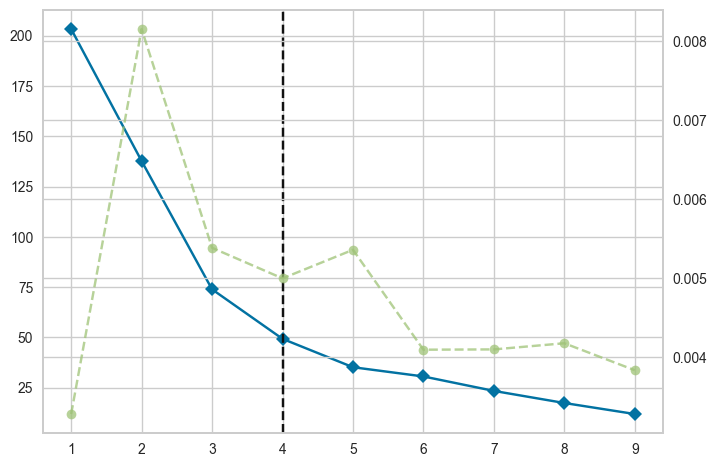

In [101]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(train_df)

In [102]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(train_df)
kmeans.labels_

array([3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1,
       0, 0, 2], dtype=int32)

In [103]:
k_means_labels = kmeans.labels_
df_kmeans = pd.concat([fin_df, pd.Series(k_means_labels, name='k_means_label')], axis=1)
df_kmeans

,시군구,principal component1,principal component2,k_means_label
0,강남구,-0.982866,7.068203,3
1,강동구,-1.602401,0.317647,1
2,강북구,-0.685524,-1.915418,2
3,강서구,-4.168855,0.078748,1
4,관악구,-1.754853,-1.165977,2
5,광진구,1.208658,-0.546952,2
6,구로구,-0.565572,-0.768556,2
7,금천구,1.195890,-2.163475,2
8,노원구,-2.847325,0.206869,1
9,도봉구,-0.769136,-2.453884,2


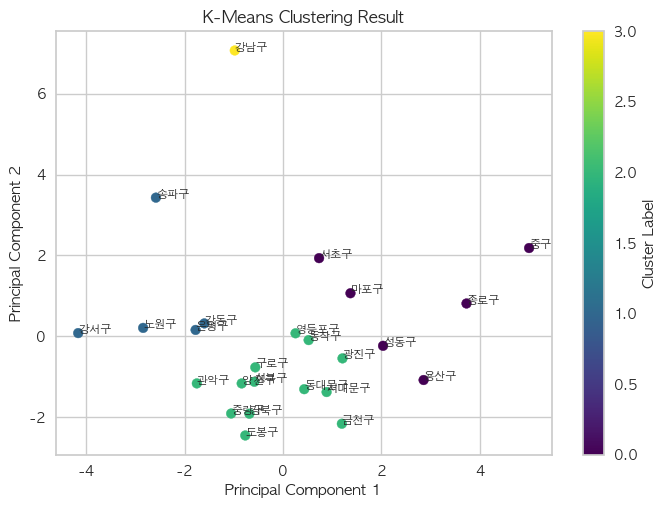

In [113]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(df_kmeans['principal component1'], df_kmeans['principal component2'], c=df_kmeans['k_means_label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Result')

# 시군구 이름 표시
for i, txt in enumerate(df_kmeans['시군구']):
    plt.annotate(txt, (df_kmeans['principal component1'][i], df_kmeans['principal component2'][i]), fontsize=8)

plt.colorbar(label='Cluster Label')
plt.show()


## (2) 계층적 군집분석

In [114]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Text(0, 0.5, 'sample index')

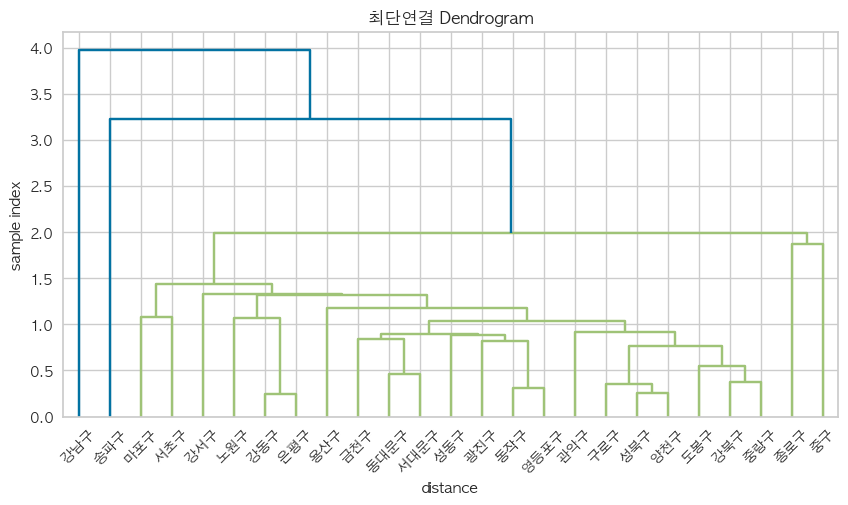

In [115]:
# 연결 : single, 거리: Euclidean
Z_short = linkage(train_df, method = "single", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_short, labels = fin_df["시군구"].values , leaf_font_size = 10)
plt.title("최단연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

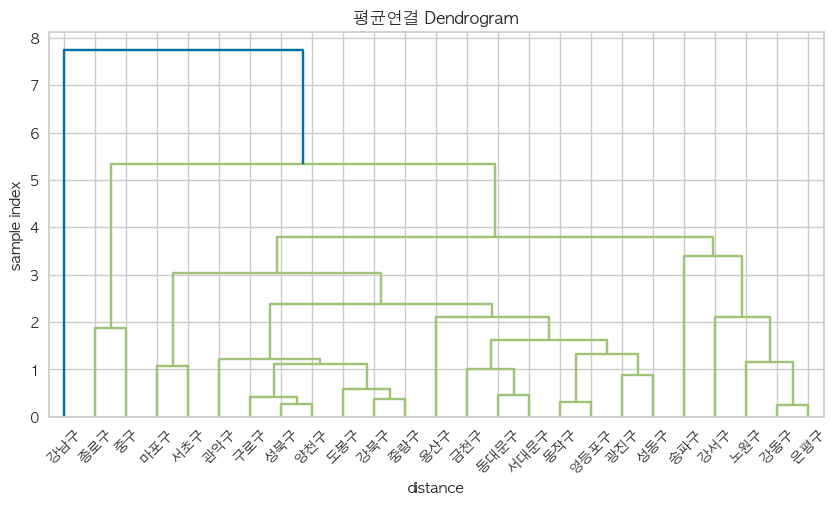

In [116]:
# 연결 : average, 거리: Euclidean
Z_average = linkage(train_df, method = "average", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_average, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("평균연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

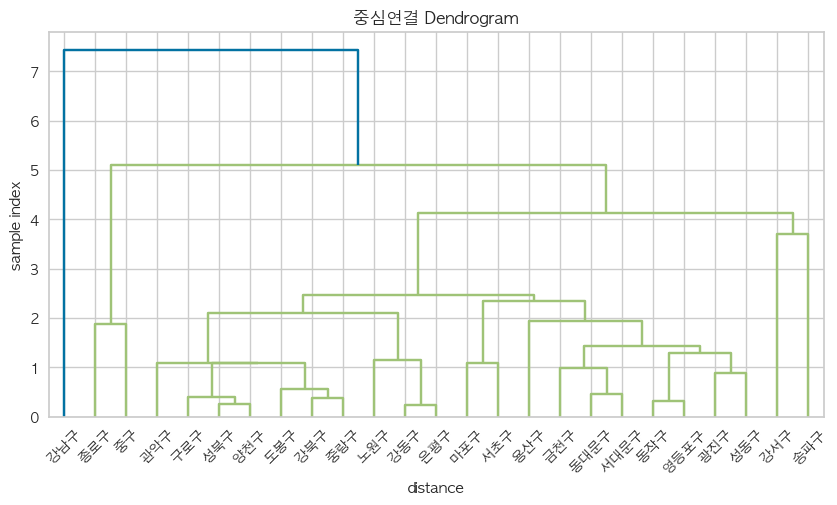

In [117]:
# 연결 : centroid, 거리: Euclidean
Z_centroid = linkage(train_df, method = "centroid", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_centroid, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("중심연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

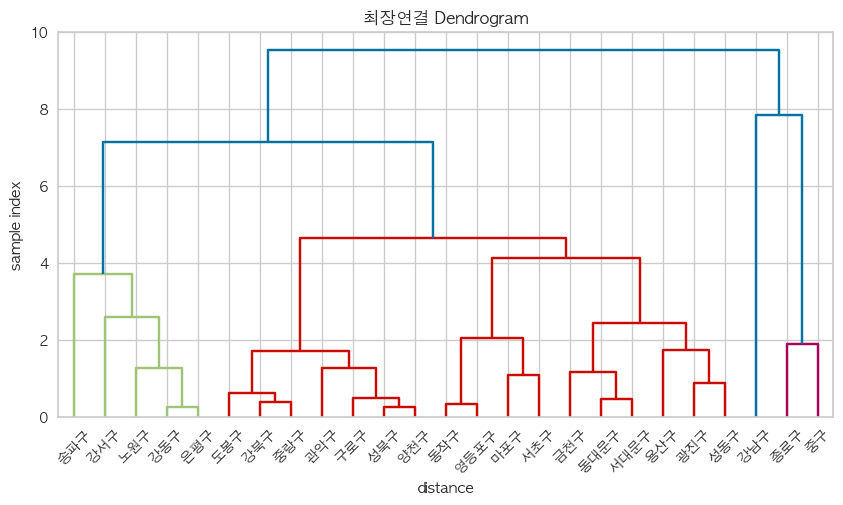

In [118]:
# 연결 : complete, 거리: Euclidean
Z_long = linkage(train_df, method = "complete", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_long, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("최장연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

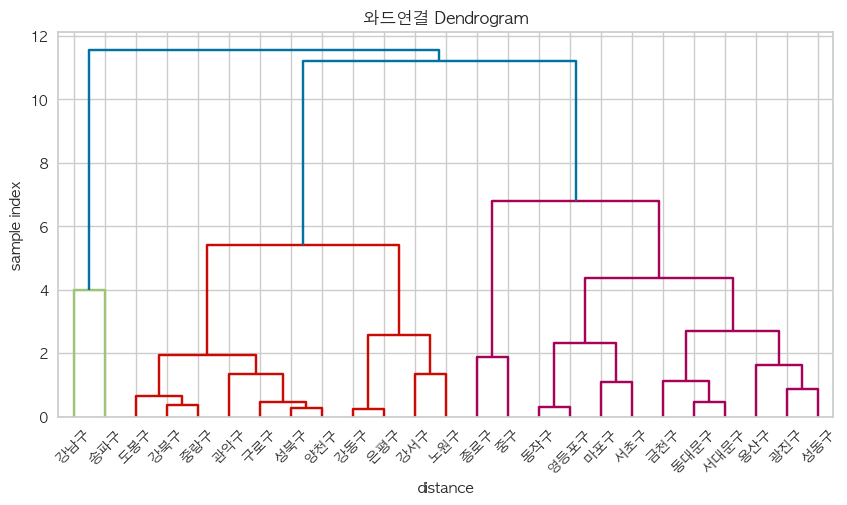

In [119]:
# 연결 : ward, 거리: Euclidean
Z_ward = linkage(train_df, method = "ward", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_ward, labels = fin_df["시군구"].values, leaf_font_size = 10)
plt.title("와드연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")